# CaseStudy #1

## Content
* [Business Understanding](#business-understanding)
* [Data Understanding](#data-understanding)
    - [Part 1](#data-understanding-part1)
    - [Part 2](#data-understanding-part2)
* [Modeling Evaluation](#modeling-and-evaluation)
    - [1.Train and Adjust Parameters](#train-adjust)
    - [2.Evaluate and Compare](#evaluate-compare)
    - [3.Visualize Results](#visualize-results)
    - [4.Summarize Ramifications](#summarize-rammification)
* [Deployment](#deployment)
* [Exceptional Work](#exceptional-work)

## 1. Business Understanding  <a id='business-understanding'/>

## 2. Data Understanding <a id = 'data-understanding'/>

### `Data import`

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge, RidgeCV, LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

In [28]:
# Data import
df1 = pd.read_csv('/Users/boyun/Desktop/SMU/DS7333-QuantifyingTheWorld/MSDS-7333-QTW/data/train.csv')
df2 = pd.read_csv('/Users/boyun/Desktop/SMU/DS7333-QuantifyingTheWorld/MSDS-7333-QTW/data/unique_m.csv')

df1 = df1.drop(['critical_temp'], axis=1)

# Merge the two data frames
df = pd.concat([df1, df2], axis=1)

### `Verify data quality`

In [29]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0,185.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Columns: 169 entries, number_of_elements to material
dtypes: float64(156), int64(12), object(1)
memory usage: 27.4+ MB


In [31]:
df.shape

(21263, 169)

#### Reason why 'material' column needs to be dropped 
- Too many unique values(string)
- Doesn't contribute to target variable

In [32]:
len(df['material'].unique())

15542

In [33]:
df = df.drop(['material'], axis = 1)

array([[<AxesSubplot:title={'center':'number_of_elements'}>,
        <AxesSubplot:title={'center':'mean_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_mean_atomic_mass'}>,
        <AxesSubplot:title={'center':'gmean_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_gmean_atomic_mass'}>,
        <AxesSubplot:title={'center':'entropy_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_entropy_atomic_mass'}>,
        <AxesSubplot:title={'center':'range_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_range_atomic_mass'}>,
        <AxesSubplot:title={'center':'std_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_std_atomic_mass'}>,
        <AxesSubplot:title={'center':'mean_fie'}>,
        <AxesSubplot:title={'center':'wtd_mean_fie'}>],
       [<AxesSubplot:title={'center':'gmean_fie'}>,
        <AxesSubplot:title={'center':'wtd_gmean_fie'}>,
        <AxesSubplot:title={'center':'entropy_fie'}>,
        <AxesSubplot:title={'center':'wtd_entropy_fi

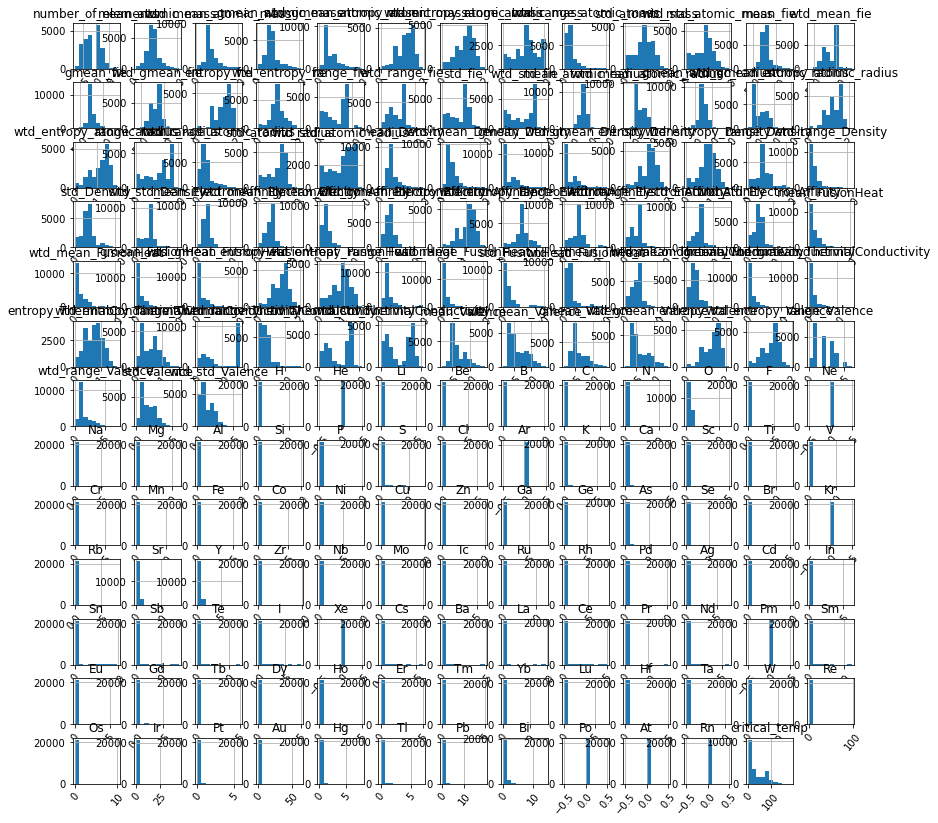

In [34]:
df.hist(figsize=(14,14), xrot=50)

#### `Missing values?`

Upon initial inspection of the 168 attributes, we noticed the following,
- No missing data 

In [35]:
df.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
Bi                       0
Po                       0
At                       0
Rn                       0
critical_temp            0
Length: 168, dtype: int64

In [36]:
def clean_dataset(df):
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
0,4.0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.00
1,5.0,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.00
2,4.0,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.00
3,4.0,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.00
4,4.0,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4.0,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.44
21259,5.0,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,122.10
21260,2.0,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.98
21261,2.0,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.84


#### `Outliers`

- We took a look the simple statistics of the continuous variables to see if they make sense and has reasonable data distribution. Outliers could be extreme minimum and maximum that resulted from data entry error or the nature of the nature itself. 

- The 25% and 75% interquartile range (IQR) was utilized in order to identify and remove the outliers from the dataset. 
- Outliers that are positioned at above and below the 1.5 times the upper and lower limit of IQR are removed
- __`gmean_atomic_mass`__ is the variable with the most reduction (Down to 17949 from 21263 entries, 15% reduction)
- Other variables also have shown significant reduction after outlier removal. Thus outlier removal is __not__ recommended. 
- Additionally, we do not have domain expertise on this dataset to determine the requirement of what it takes to be outliers. Thus we assume that there is no outliers for this study. 

In [37]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [38]:
df_outlier_removed=remove_outlier_IQR(df)
df_outlier_removed.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21249.000000,19657.000000,20024.000000,17949.000000,20016.000000,20876.000000,21263.000000,21263.000000,19634.000000,21259.000000,...,20844.0,21021.0,20418.0,20355.0,20008.0,18874.0,21263.0,21263.0,21263.0,21262.000000
mean,4.112005,85.114701,67.080157,65.017534,51.997273,1.186367,1.063884,115.601251,27.231297,44.381371,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.414137
std,1.434295,21.491900,23.731332,15.302059,25.713811,0.334414,0.401423,54.626887,15.093604,20.022619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.239597
min,1.000000,30.773670,6.423452,28.006329,1.960849,0.252926,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000210
25%,3.000000,72.894330,51.790200,58.637102,35.083280,0.994773,0.775363,78.512902,15.778377,32.890369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.362500
50%,4.000000,84.188275,59.233256,64.950920,37.745689,1.199897,1.146783,122.906070,25.192187,45.123500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.000000
75%,5.000000,97.232400,81.043039,73.088376,68.202584,1.444537,1.359418,154.119320,36.423869,59.316524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.000000
max,8.000000,142.199717,137.015000,108.192809,129.870304,1.983797,1.958203,207.972460,70.616350,96.824500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143.000000


### `Splitting train and test dataset`

In [90]:
feature_num = len(X)

In [92]:
# Separating the dependent and independent variables
y = df['critical_temp']
X = df.drop(labels=['critical_temp'], axis = 1)

features = list(X.columns)

# Dividing the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
X_train.shape, X_test.shape




((15947, 167), (5316, 167))

### `Normalization`

In [81]:
# Train_X data
from sklearn import preprocessing
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

## 3. Modeling and Evaluation <a id='modeling-and-evaluation'/>

### Model #1 -  Regular Linear Regression

In [74]:
# Building and fitting the Linear Regression model
reg = LinearRegression().fit(X_train, y_train)

# Evaluating the Linear Regression model
reg.score(X_train, y_train)

0.7683816092272884

### Model #2 -  L2, RIDGE

In [94]:
# loop through different penalty score (alpha) and obtain the estimated coefficient (weights)
alphas = 10 ** np.arange(1, 5)
print('different alpha values:', alphas)

# stores the weights of each feature
ridge_weight = []
for alpha in alphas:    
    ridge = Ridge(alpha = alpha, fit_intercept = True)
    ridge.fit(X_train_std, y_train)
    ridge_weight.append(ridge.coef_)

different alpha values: [   10   100  1000 10000]


In [95]:
def weight_versus_alpha_plot(weight, alphas, features):
    """
    Pass in the estimated weight, the alpha value and the names
    for the features and plot the model's estimated coefficient weight 
    for different alpha values
    """
    fig = plt.figure(figsize = (8, 6))
    
    # ensure that the weight is an array
    weight = np.array(weight)
    for col in range(weight.shape[1]):
        plt.plot(alphas, weight[:, col], label = features[col])

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
    
    # manually specify the coordinate of the legend
    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title('Coefficient Weight as Alpha Grows')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    return fig

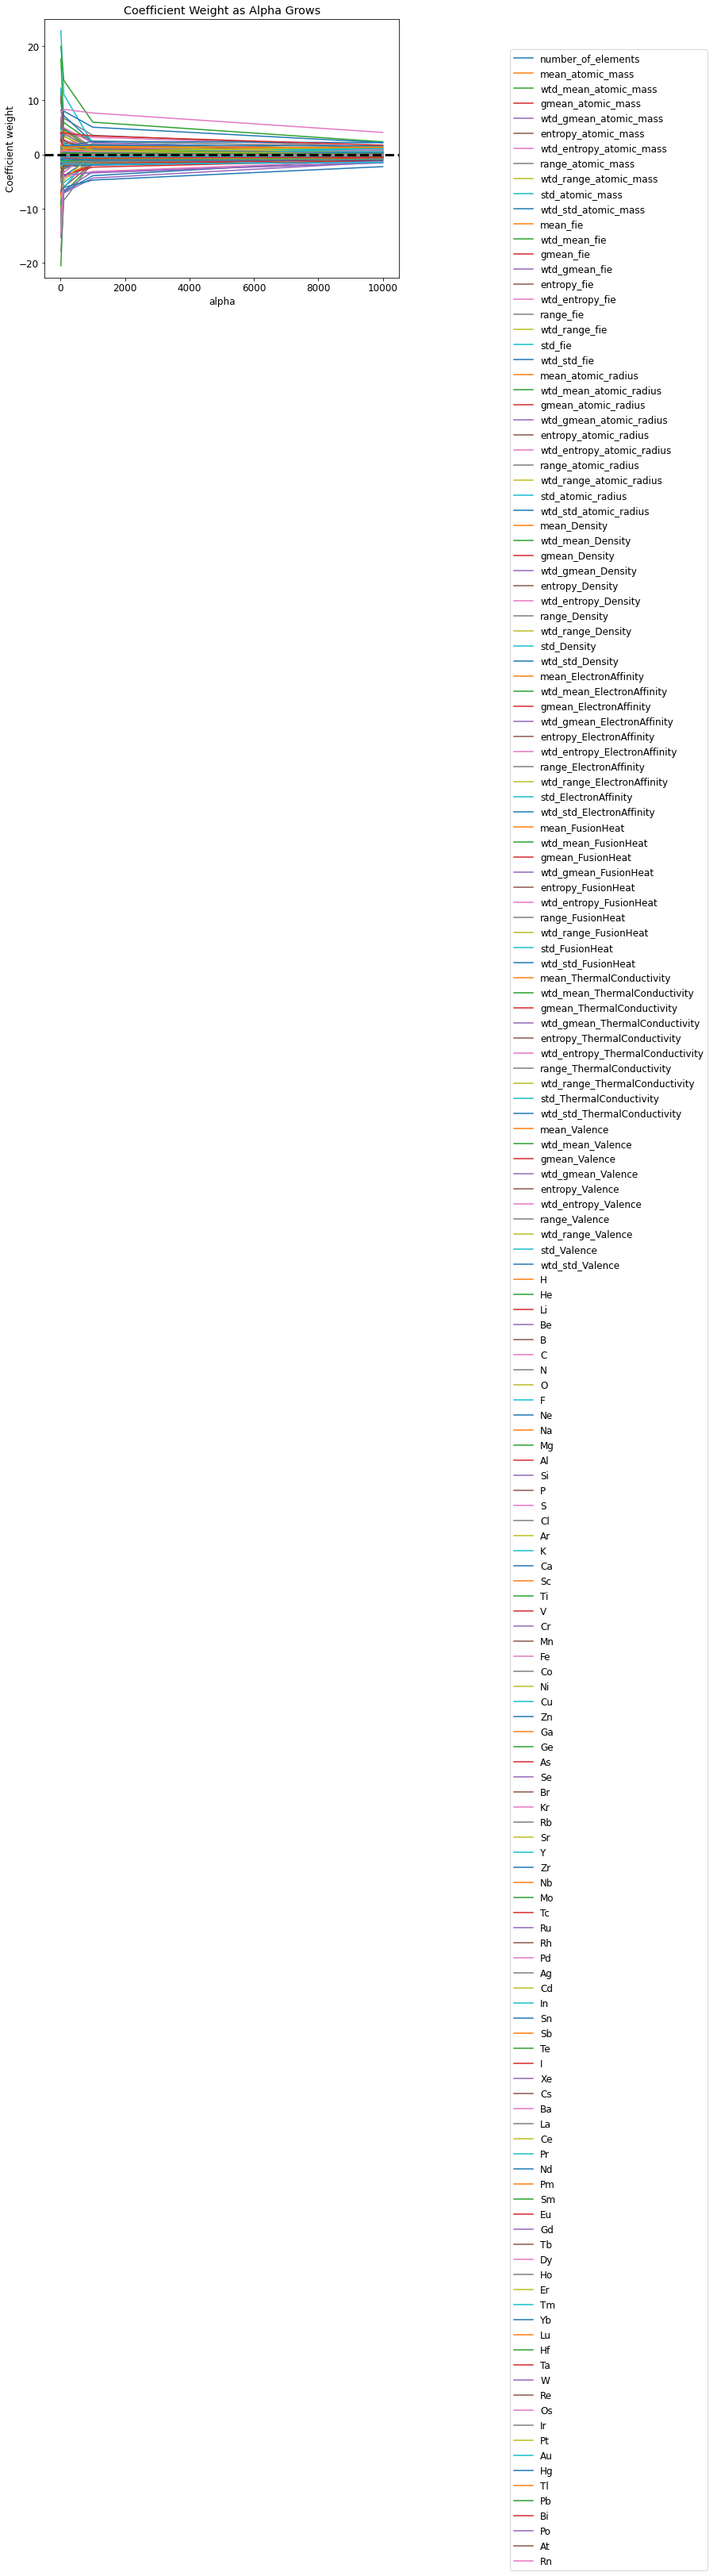

In [96]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12


ridge_fig = weight_versus_alpha_plot(ridge_weight, alphas, features)

In [125]:
# alpha: array of alpha values to try; must be positive, increase for more regularization
# create an array of alpha values and select the best one with RidgeCV
alpha_range = 10. ** np.arange(-2, 3)
ridge_cv = RidgeCV(alphas = alpha_range, fit_intercept = True)
ridge_cv.fit(X_train_std, y_train)

# examine the coefficients and the errors of the predictions 
# using the best alpha value
y_pred = ridge_cv.predict(X_test_std)

idx_ridge = np.argpartition(ridge_cv.coef_, -10)[-10:]
indices_ridge = idx[np.argsort((-ridge_cv.coef_)[idx_ridge])].tolist()
X_train.columns[indices_ridge]

print('coefficients:\n', ridge_cv.coef_)
print('best alpha:\n' , ridge_cv.alpha_)
print('\nRSS:', np.sum((y_test - y_pred) ** 2))

print('Top 10 coefficients that RIDGE chose are:\n', X_train.columns[indices])

coefficients:
 [ 1.19326769e+00  4.28518037e+00 -7.04259864e+00  2.70909686e+00
 -1.46259678e+00 -5.97008428e+00  3.57968283e+00  6.69167150e+00
  5.00832634e-01  6.37851805e-01 -6.86624827e+00 -1.43017458e+00
  1.17262979e+00  1.51437575e+00  1.49615677e+00  1.92606685e+00
  3.89279140e+00  4.82540465e+00  1.43236360e+00 -5.15344268e+00
 -1.95863056e+00 -2.62951574e-01  5.90825312e+00 -2.59942152e+00
 -1.98342555e+00 -7.95780161e-02  1.25137334e+00  4.46387959e+00
 -2.09338029e+00 -6.08228792e+00  7.19205964e+00 -4.07318303e+00
  4.72192544e+00 -3.96748852e+00  1.55668594e+00 -2.41354201e+00
 -2.20470300e+00 -2.69386956e+00  3.73863033e-01  1.98496085e+00
 -1.45939844e+00  9.77446615e-01  3.44003234e+00  1.20373183e+00
 -6.60761063e+00  5.34202732e-01 -4.18080086e+00 -8.45919727e+00
 -2.03866189e+00  1.10708971e+01 -3.97181321e+00  7.37658148e-01
 -1.64646644e+00  2.55642616e-01 -3.07557683e-01 -1.62436264e+00
  4.96198297e+00 -1.56277638e+00  3.30594009e+00  1.26591488e-01
 -2.153307

### Model #3 -  L1, LASSO

different alpha values: [0.01, 0.1, 1, 5, 8]


/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 748892.8917692418, tolerance: 1873.5730960173769
  model = cd_fast.enet_coordinate_descent(


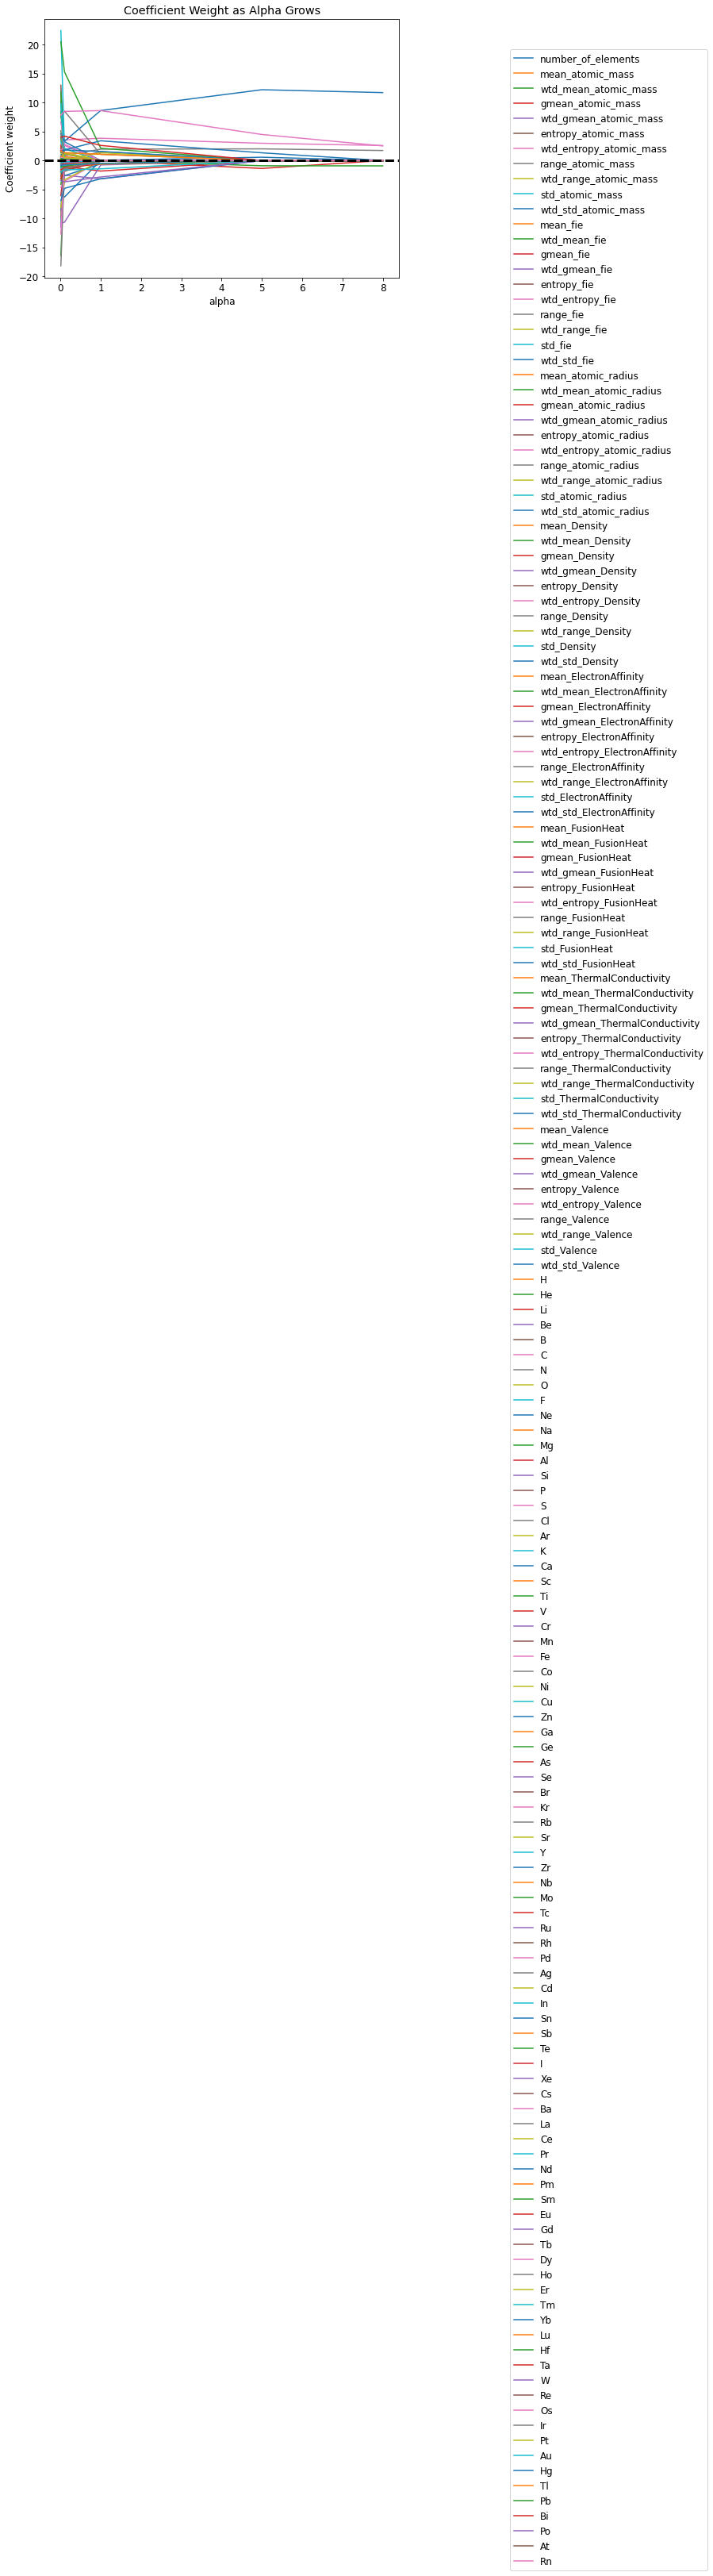

In [97]:
# does the same thing above except for lasso
alphas = [0.01, 0.1, 1, 5, 8]
print('different alpha values:', alphas)

lasso_weight = []
for alpha in alphas:    
    lasso = Lasso(alpha = alpha, fit_intercept = True)
    lasso.fit(X_train_std, y_train)
    lasso_weight.append(lasso.coef_)

lasso_fig = weight_versus_alpha_plot(lasso_weight, alphas, features)

In [126]:
# n_alphas: number of alpha values (automatically chosen) to try
# select the best alpha with LassoCV
lasso_cv = LassoCV(n_alphas = 10, fit_intercept = True)
lasso_cv.fit(X_train_std, y_train)

idx_lasso = np.argpartition(lasso_cv.coef_, -10)[-10:]
indices_lasso = idx[np.argsort((-lasso_cv.coef_)[idx_lasso])].tolist()

# examine the coefficients and the errors of the predictions 
# using the best alpha value
y_pred = lasso_cv.predict(X_test_std)
print('coefficients:\n', lasso_cv.coef_)
print('best alpha:\n', lasso_cv.alpha_)
print('\nRSS:', np.sum(( y_test - y_pred ) ** 2))

print('Top 10 coefficients that LASSO chose are:\n', X_train.columns[indices_lasso])

/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62602.30163316522, tolerance: 1500.5869506178701
  model = cd_fast.enet_coordinate_descent_gram(
/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72043.3030124912, tolerance: 1502.269869919865
  model = cd_fast.enet_coordinate_descent_gram(
/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70047.90181843191, tolerance: 1494.1573220901416
  model = cd_fast.enet_coordinate_descent_gram(
/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/sk

coefficients:
 [ 8.19850490e-01  3.29058574e+00 -4.87094696e+00  0.00000000e+00
 -0.00000000e+00 -2.00482909e+00  4.19783383e+00  8.57308828e+00
 -0.00000000e+00  0.00000000e+00 -6.82342345e+00  0.00000000e+00
  0.00000000e+00  7.27614345e-01  1.11605477e+00  0.00000000e+00
  3.21666915e-01  2.05665339e+00  0.00000000e+00 -3.45353201e+00
 -0.00000000e+00 -0.00000000e+00  1.96790338e+00 -1.73719532e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  2.07041146e+00
 -1.24776147e+00 -3.05288110e+00  5.96184283e+00 -2.77271767e+00
  3.87973630e+00 -2.18481293e+00  0.00000000e+00 -2.70830851e+00
 -1.17722928e+00 -1.28641930e+00  5.88330980e-01  0.00000000e+00
 -6.53918143e-01  8.53263962e-01  0.00000000e+00  1.14681709e+00
 -3.86213952e+00  0.00000000e+00 -3.46230278e+00 -7.75311013e+00
 -7.54058492e-01  1.04214838e+01 -3.05398740e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  3.71710431e+00 -4.09222840e-01  1.81066059e+00 -0.00000000e+00
 -2.393026

### Model #4 -  Elastic Net

### Model Comparison

In [ ]:
# Building the two lists for visualization
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [linearModel.score(X_test, y_test),
         ridgeModelChosen.score(X_test, y_test),
         lassoModelChosen.score(X_test, y_test)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regreesion'] = linearModel.score(X_test, y_test)
mapping['Ridge Regreesion'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

In [ ]:
# Plotting the scores
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()

## Conclusion

The following variables have been identifed the most significant with each regularization method in the descending order. 

- `RIDGE` : 'wtd_mean_ThermalConductivity', 'std_ElectronAffinity', 'Ba','wtd_std_ThermalConductivity', 'wtd_std_atomic_radius','range_atomic_mass', 'wtd_mean_atomic_radius', 'wtd_entropy_FusionHeat','range_fie', 'wtd_mean_Density'

- `LASSO` : 'std_ElectronAffinity', 'wtd_std_ThermalConductivity', 'Ba','wtd_std_atomic_radius', 'wtd_mean_ThermalConductivity','range_atomic_mass', 'wtd_mean_atomic_radius', 'wtd_entropy_FusionHeat','range_fie', 'wtd_mean_Density'